### Questions
* ...?

### Objectives
YWBAT
* give 3 examples of when logistic regression is used in the real world
* explain how linear regression is tied to logistic regression
    * They both deal with prediction
    * They both have coefficients/parameters
    * Logistic regression is a transformation of linear regression
* explain the purpose of a sigmoid function
    * Purpose is to give us percentage values of datapoints as opposed to absolute values
    * Help us build a model to predict on boolean values 
    * Transformation function - transforms the linear model to values between 0 and 1 (S-Curve)
* When does a high vs low threshold matter

### Outline

In [56]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs


import matplotlib.pyplot as plt
import seaborn as sns

### Let's load in some mocked data

In [2]:
df = pd.read_csv("data.csv")
x = df["x"]
y = df["y"]
df.head()

,x,y
0,0.514780,1.0
1,-3.279173,0.0
2,-3.845859,0.0
3,0.947575,1.0
4,1.884433,1.0


### Plotting our points with color

In [28]:
x, y = make_blobs(n_samples=1000, n_features=1, centers=2, cluster_std=2.5, random_state=np.random.seed(42))

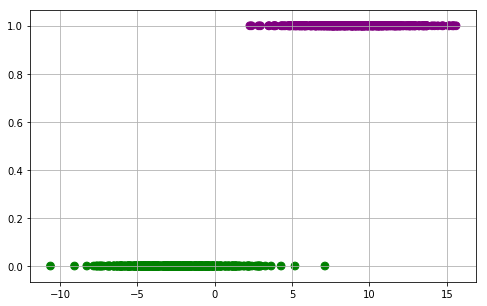

In [31]:
color_dict = {0: 'green', 1: 'purple'}
colors = [color_dict[j] for j in y]


plt.figure(figsize=(8, 5))
plt.grid()
plt.scatter(x, y, color=colors, s=60)
plt.show()

# What are some possible values 0 and 1
# 0: Benign
# 1: Malignant

### Why is Linear Regression no longer sufficient?
* The range of linreg = -infty to infty 
* The range of our classes are 0 and 1
* Plugging in our linear regression equation into a sigmoid function bounds it between 0 and 1. 
    * This is also normalization

### How can we estimate these points?     

$$f(x)= \frac{1}{1 + e^{-c_1(x - c_2)}}$$   
![](logreg.gif)

In [32]:
def sigmoid(x, b0=0, b1=1):
    # y = 1 / (1 + e^-(b0 + Xb1))
    # input is x
    # output is y values
    # code here
    return 1/(1 + np.exp(-(b0 + x*b1)))

In [147]:
# get the y_preds
y_pred = sigmoid(x, -3.99, 1.37)

In [148]:
def make_plot(x, y, y_pred):
    # Plot both our predictions and out points 
# We need a color dictionary
    color_dict = {0: 'green', 1: 'purple'}
    colors = [color_dict[j] for j in y]


    plt.figure(figsize=(8, 5))
    plt.grid()
    plt.scatter(x, y, color=colors, s=60)
    plt.scatter(x, y_pred)
    plt.show()

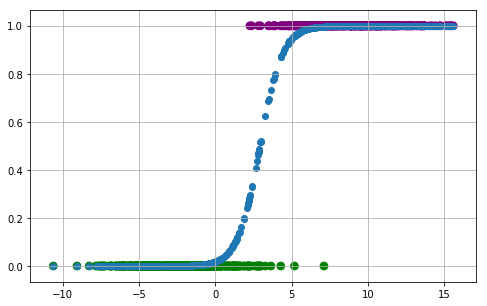

In [149]:
make_plot(x, y, y_pred)

### Why are these labels better than our y_preds
    * We can start predicting once we have labels

### What are the y_pred values similar to? Probability

In [150]:
def get_labels(y_pred, thresh=0.50):
    # input sigmoid values
    # return labels (0s and 1s)
    # Code here
    labels = [1 if j > thresh else 0 for j in y_pred]
    return labels

In [151]:
# How can we measure our 'goodness' of fit?
labels = get_labels(y_pred)
pndict = get_p_n_dict(y, labels)

In [152]:
def get_p_n_dict(y, y_pred):
    # {TP:, FP:, TN:, FN:}
    # Code here
    pndict = {"TP": 0, "FP": 0, "TN": 0, "FN": 0}
    for true, pred in zip(y, y_pred):
        if pred == 0:
            if true == 0:
                pndict["TN"] += 1
            if true == 1:
                pndict["FN"] += 1
        
        elif pred == 1:
            if true == 1:
                pndict["TP"] += 1
            if true == 0:
                pndict["FP"] += 1
    return pndict


# 
def recall(pndict):
    # FN rate/ratio
    num = pndict['TP']
    denom = pndict['TP']+pndict['FN']
    return num/denom

# 
def precision(pndict):
    # FP rate/ratio
    num = pndict['TP']
    denom = pndict['TP']+pndict['FP']
    return num/denom


#
def f1(pndict):
    # harmonic/geometric mean of recall and precision
    prec = precision(pndict)
    rec = recall(pndict)
    num = 2*prec*rec
    denom = prec + rec
    return num/denom


def accuracy(pndict):
    num = pndict['TP']+pndict['TN']
    denom = sum(pndict.values())
    return num/denom

In [153]:
accuracy(pndict)

0.99

In [154]:
# get new labels based on a threshold
labels = get_labels(y_pred)
pndict = get_p_n_dict(y, labels)
recall(pndict), precision(pndict), accuracy(pndict), f1(pndict)

(0.994, 0.9861111111111112, 0.99, 0.9900398406374502)

In [155]:
cm = confusion_matrix(y, labels)
cm

array([[493,   7],
       [  3, 497]])

In [156]:
def plot_confusion(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, cmap=sns.color_palette('Purples'), fmt='0g', annot_kws={"ha":"center", "va":"top"})
    sns.heatmap(cm/np.sum(cm), annot=True, cmap=sns.color_palette('Purples'), fmt='0.01%', annot_kws={"ha":"center", "va":"bottom"})
    plt.xlabel("Pred", fontsize=16)
    plt.ylabel("Actual", fontsize=16)
    plt.show()

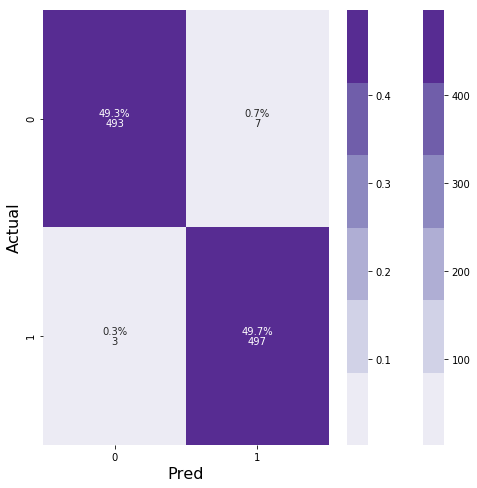

In [158]:
plot_confusion(y, labels)

### What about thresholds?

In [159]:
# if this is cancer
false_negatives = []
for j, pred, label in zip(y, y_pred, labels):
    if j != label and label == 0:
        false_negatives.append(pred)
print(false_negatives)

[array([0.47357205]), array([0.29374491]), array([0.32739307])]


In [160]:
new_labels = get_labels(y_pred, thresh=0.30)

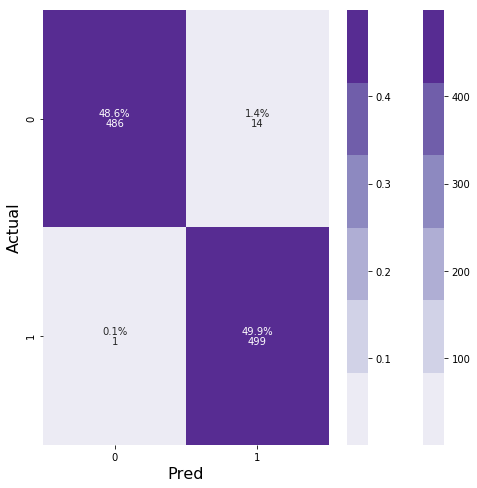

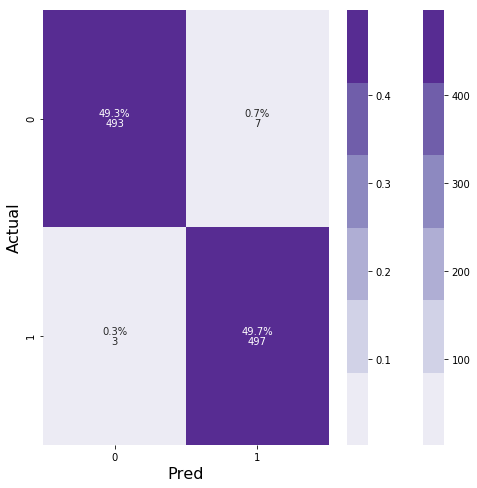

(None, None)

In [161]:
plot_confusion(y, new_labels), plot_confusion(y, labels)

In [194]:
logreg = LogisticRegression(fit_intercept=False, penalty='l1', n_jobs=-1)

In [195]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.80)

In [197]:
logreg.fit(xtrain, ytrain)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
### out of the box predictions using sklearn uses 50% threshold
logreg.predict(xtest)

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1])

In [199]:
probs = logreg.predict_proba(x) # Prob(0|x), Prob(1|x)

In [200]:
def get_labels_predict_proba(probs, thresh=0.50):
    labels = []
    for prob in probs:
        if prob[1] >= thresh:
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [201]:
new_new_labels = get_labels_predict_proba(probs, thresh=0.20)

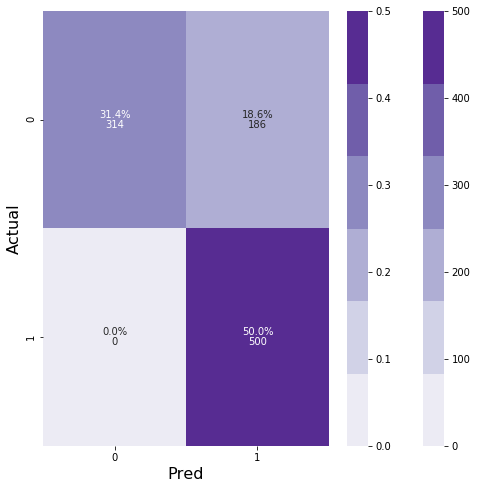

In [202]:
plot_confusion(y, new_new_labels)

In [203]:
logreg.coef_, logreg.intercept_

(array([[0.80959107]]), 0.0)

In [144]:
# Newsfeed => Accuracy
# Giving out loan => Precision

### Assessment
- Learned about thresholds and how to set thresholds
- Pros and cons for labeling function
- I learned how to put both numbers and percentages on heatmap
- Sigmoid can be interpreted as a probability function, though it isn't exclusively one
- Confusion Matrix analysis separates the wheat and the chaff 